# Importer données

In [165]:
import pandas
import numpy as np
import statistics
import scipy.stats as stats
# pip install seaborn
import seaborn as sns
# pip install matplotlib
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd

In [166]:
df1 = pd.read_csv("/content/CO2.csv", sep=",")
df2 = pd.read_csv("/content/CO2metadata.csv", sep=",")
df_pib = pd.read_csv("/content/pib.csv")
df_srf = pd.read_csv("/content/srf.csv")
df_pop = pd.read_csv("/content/pop.csv")
#df_export = pd.read_csv("/content/2a4303fc-be48-4b1f-8bcb-c465726cc4ef_Data.csv")

## Le dataset CO2.csv contenait des agrégations tels que "word", "pays ocde", etc,  qui ont été supprimés du fichier pour ne pas considérer des doublons

In [167]:
df1["Country Name"].unique()

array(['China', 'United States', 'India', 'Russian Federation', 'Japan',
       'Germany', 'Iran, Islamic Rep.', 'Korea, Rep.', 'Saudi Arabia',
       'Indonesia', 'Canada', 'Mexico', 'South Africa', 'Brazil',
       'United Kingdom', 'Australia', 'Turkey', 'Poland', 'Thailand',
       'Malaysia', 'Kazakhstan', 'Spain', 'Egypt, Arab Rep.',
       'United Arab Emirates', 'Ukraine', 'Argentina', 'Pakistan',
       'Vietnam', 'Iraq', 'Netherlands', 'Venezuela, RB', 'Algeria',
       'Philippines', 'Nigeria', 'Qatar', 'Czech Republic', 'Kuwait',
       'Colombia', 'Belgium', 'Uzbekistan', 'Chile', 'Bangladesh',
       'Turkmenistan', 'Romania', 'Israel', 'Oman', 'Greece', 'Austria',
       'Morocco', 'Belarus', 'Peru', 'Libya', 'Portugal', 'Finland',
       'Hungary', 'Serbia', 'Trinidad and Tobago', 'Hong Kong SAR, China',
       'Sweden', 'Bulgaria', 'Ecuador', 'Norway', 'Ireland', 'Azerbaijan',
       'Singapore', 'Angola', 'Switzerland', 'New Zealand',
       'Slovak Republic', 'Denmar

In [168]:
df_pop.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0


In [169]:
df_pop.drop(["Country Name", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

## On conserve la surface de 2018

In [170]:
df_srf = df_srf[["Country Code", "2018"]]

In [171]:
df_pib.drop(["Country Name", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

In [172]:
df1.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,780726.302,552066.850,440359.029,436695.696,436923.050,475972.933,522789.522,433234.048,468928.626,577237.138,771617.474,876633.020,931575.681,968542.708,988014.478,1145607.470,1196193.735,1310310.775,1462168.579,1494859.884,1467192.369,1451501.276,1580260.647,1667029.201,1814908.310,1966553.428,2068969.071,2209708.531,2369501.723,2408540.605,2442918.730,2564699.800,2686532.208,2878694.009,3058241.330,3320285.15,3463089.131,3469510.048,3324344.519,3318055.614,3405179.867,3487566.356,3850269.326,4540417.061,5233538.733,5896957.705,6529291.518,6697654.489,7553070.247,7557789.676,8776040.416,9733538.120,1.002857e+07,10258007.13,1.029193e+07,1.014500e+07,9893037.952
1,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2890696.100,2880505.507,2987207.873,3119230.874,3255995.306,3390922.571,3561878.111,3695708.943,3831354.940,4024748.853,4328904.501,4356770.034,4564952.958,4770194.948,4598487.673,4406329.539,4613100.668,4742292.745,4890861.250,4901796.244,4723209.677,4535800.308,4306748.487,4341878.347,4475192.132,4492555.377,4495463.308,4688373.177,4892526.068,4955081.421,4823403.118,4820847.219,4909533.614,5028674.444,5094354.081,5132919.92,5252112.088,5368715.354,5401010.623,5504669.379,5693684.894,5595794.329,5641309.133,5675701.926,5756075.232,5789727.291,5697285.888,5789030.561,5614110.994,5263505.457,5395532.125,5270047.385,5.082000e+06,5170359.99,5.225413e+06,5.126913e+06,5006302.077


In [173]:
df2.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN


In [174]:
print(df1.shape)
print(df2.shape)

(218, 61)
(263, 6)


## Merge pour avoir Region et Income groupe dans le même dataFrame

In [175]:
df_co2 = df1.merge(df2, how="left", on="Country Code")
print(df_co2.shape)

(218, 66)


In [176]:
df_co2.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,780726.302,552066.850,440359.029,436695.696,436923.050,475972.933,522789.522,433234.048,468928.626,577237.138,771617.474,876633.020,931575.681,968542.708,988014.478,1145607.470,1196193.735,1310310.775,1462168.579,1494859.884,1467192.369,1451501.276,1580260.647,1667029.201,1814908.310,1966553.428,2068969.071,2209708.531,2369501.723,2408540.605,2442918.730,2564699.800,2686532.208,2878694.009,3058241.330,3320285.15,3463089.131,3469510.048,3324344.519,3318055.614,3405179.867,3487566.356,3850269.326,4540417.061,5233538.733,5896957.705,6529291.518,6697654.489,7553070.247,7557789.676,8776040.416,9733538.120,1.002857e+07,10258007.13,1.029193e+07,1.014500e+07,9893037.952,East Asia & Pacific,Upper middle income,On 1 July 1997 China resumed its exercise of s...,China,NaN
1,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,2890696.100,2880505.507,2987207.873,3119230.874,3255995.306,3390922.571,3561878.111,3695708.943,3831354.940,4024748.853,4328904.501,4356770.034,4564952.958,4770194.948,4598487.673,4406329.539,4613100.668,4742292.745,4890861.250,4901796.244,4723209.677,4535800.308,4306748.487,4341878.347,4475192.132,4492555.377,4495463.308,4688373.177,4892526.068,4955081.421,4823403.118,4820847.219,4909533.614,5028674.444,5094354.081,5132919.92,5252112.088,5368715.354,5401010.623,5504669.379,5693684.894,5595794.329,5641309.133,5675701.926,5756075.232,5789727.291,5697285.888,5789030.561,5614110.994,5263505.457,5395532.125,5270047.385,5.082000e+06,5170359.99,5.225413e+06,5.126913e+06,5006302.077,North America,High income,NaN,United States,NaN


In [177]:
print(df_co2["Indicator Name"].unique())

['CO2 emissions (kt)']


In [178]:
df_co2 = df_co2.drop('Indicator Name', 1)
df_co2 = df_co2.drop('Indicator Code', 1)
df_co2 = df_co2.drop('Unnamed: 5', 1)
df_co2 = df_co2.drop('TableName', 1)
df_co2 = df_co2.drop('SpecialNotes', 1)

In [179]:
df_co2 = df_co2.sort_values(by="Country Name")

In [180]:
df_co2.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Region,IncomeGroup
106,Afghanistan,AFG,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,942.419,1672.152,1895.839,1532.806,1639.149,1917.841,2126.860,1987.514,2390.884,2159.863,2240.537,1760.16,1983.847,2101.191,2522.896,2830.924,3509.319,3142.619,3124.284,2867.594,2775.919,2614.571,2438.555,1393.460,1345.789,1294.451,1243.113,1177.107,1096.433,1041.428,821.408,773.737,817.741,1070.764,1213.777,916.750,1327.454,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488,8672.455,South Asia,Low income
131,Albania,ALB,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,3245.295,3744.007,4352.729,5643.513,5291.481,4345.395,4594.751,4950.450,5720.520,6494.257,7587.023,5170.47,7341.334,7308.331,7631.027,7825.378,7880.383,8056.399,7444.010,7326.666,8984.150,5515.168,4286.723,2515.562,2335.879,1925.175,2086.523,2016.850,1543.807,1752.826,2984.938,3021.608,3223.293,3751.341,4294.057,4165.712,4253.720,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4924.781,4913.780,5489.499,4616.753,4536.079,Europe & Central Asia,Upper middle income
31,Algeria,DZA,6160.560,6065.218,5669.182,5427.160,5650.847,6596.933,8430.433,8441.434,9061.157,11276.025,15075.037,18668.697,28349.577,38312.816,31906.567,32031.245,39170.894,41891.808,62529.684,45621.147,66519.38,46438.888,39269.903,52625.117,71103.130,72786.283,76277.267,84120.980,83948.631,80046.943,76970.330,79049.519,80138.618,82210.473,86416.522,95294.329,97098.493,87340.606,106999.393,92045.367,87861.320,84219.989,89907.506,91575.991,88510.379,107278.085,101069.854,109404.945,110208.018,121399.702,119177.500,121187.016,129987.816,134465.223,145411.218,153133.920,150005.969,Middle East & North Africa,Lower middle income
205,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific,Upper middle income
182,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.037,407.037,407.037,410.704,407.037,425.372,454.708,465.709,491.378,513.380,524.381,524.381,531.715,535.382,561.051,575.719,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042,465.709,469.376,Europe & Central Asia,High income


## Transposition des donnees

In [181]:
df_co2_melt = df_co2.melt(id_vars=["Country Name", "Country Code", "Region","IncomeGroup"])

In [182]:
df_co2_melt.head()

,Country Name,Country Code,Region,IncomeGroup,variable,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
2,Algeria,DZA,Middle East & North Africa,Lower middle income,1960,6160.560
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,1960,NaN
4,Andorra,AND,Europe & Central Asia,High income,1960,NaN


In [183]:
df_co2_melt.columns = ["Country", "Country Code", "Region", "IncomeGroup", "Year", "CO2"]

In [184]:
df_co2_melt = df_co2_melt.sort_values(by=["Country", "Year"])

In [185]:
df_co2_melt.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
218,Afghanistan,AFG,South Asia,Low income,1961,491.378
436,Afghanistan,AFG,South Asia,Low income,1962,689.396
654,Afghanistan,AFG,South Asia,Low income,1963,707.731
872,Afghanistan,AFG,South Asia,Low income,1964,839.743


In [186]:
df_co2_melt['CO2_Region_Year'] = df_co2_melt.groupby(['Region', 'Year'])["CO2"].transform('sum')

In [187]:
df_co2_melt['CO2_IncomeGroup_Year'] = df_co2_melt.groupby(['IncomeGroup', 'Year'])["CO2"].transform('sum')

In [188]:
df_co2_melt.head(20)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276
436,Afghanistan,AFG,South Asia,Low income,1962,689.396,179019.273,43934.327
654,Afghanistan,AFG,South Asia,Low income,1963,707.731,194453.676,46823.923
872,Afghanistan,AFG,South Asia,Low income,1964,839.743,191982.118,51437.009
1090,Afghanistan,AFG,South Asia,Low income,1965,1008.425,209767.068,61011.546
1308,Afghanistan,AFG,South Asia,Low income,1966,1092.766,216364.001,66545.049
1526,Afghanistan,AFG,South Asia,Low income,1967,1283.450,219829.316,72001.545
1744,Afghanistan,AFG,South Asia,Low income,1968,1224.778,241530.622,83519.592
1962,Afghanistan,AFG,South Asia,Low income,1969,942.419,244372.547,92525.744


In [189]:
df_co2_region_year = df_co2_melt[["Region", "Year", "CO2_Region_Year"]]
print(df_co2_region_year.shape)

(12426, 3)


In [190]:
df_co2_region_year = df_co2_region_year.drop_duplicates()
print(df_co2_region_year.shape)

(456, 3)


In [191]:
df_co2_region_year = df_co2_region_year[df_co2_region_year["Region"].notnull()]
print(df_co2_region_year.shape)

(399, 3)


In [192]:
df_co2_region_year.head(20)

,Region,Year,CO2_Region_Year
0,South Asia,1960,151645.118
218,South Asia,1961,162624.116
436,South Asia,1962,179019.273
654,South Asia,1963,194453.676
872,South Asia,1964,191982.118
1090,South Asia,1965,209767.068
1308,South Asia,1966,216364.001
1526,South Asia,1967,219829.316
1744,South Asia,1968,241530.622
1962,South Asia,1969,244372.547


In [193]:
df_co2_Incomegroup_year = df_co2_melt[["IncomeGroup", "Year", "CO2_IncomeGroup_Year"]]
print(df_co2_Incomegroup_year.shape)

(12426, 3)


In [194]:
df_co2_Incomegroup_year = df_co2_Incomegroup_year.drop_duplicates()
print(df_co2_Incomegroup_year.shape)

(285, 3)


In [195]:
df_co2_Incomegroup_year = df_co2_Incomegroup_year[df_co2_Incomegroup_year["IncomeGroup"].notnull()]
print(df_co2_Incomegroup_year.shape)

(228, 3)


In [196]:
df_co2_Incomegroup_year_pivot = df_co2_Incomegroup_year.pivot("IncomeGroup", "Year", "CO2_IncomeGroup_Year")

In [197]:
df_co2_Incomegroup_year_pivot.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
IncomeGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High income,5163044.325,5277047.688,5527628.466,5838454.387,6133424.200,6405790.625,6686547.146,6988542.931,7361348.486,7843353.634,8526537.736,8697551.948,9131515.729,9612890.153,9396225.458,9101655.348,9601225.426,9789276.520,1.004391e+07,1.030950e+07,1.008981e+07,9696252.064,9336097.659,9305265.523,9547826.572,9661694.256,9676585.943,9946070.106,1.029126e+07,1.054639e+07,1.028101e+07,1.131444e+07,1.169822e+07,1.186127e+07,1.200802e+07,1.206387e+07,1.241962e+07,1.248742e+07,1.244029e+07,1.260434e+07,1.301049e+07,1.296961e+07,1.304444e+07,1.323757e+07,1.344489e+07,1.347258e+07,1.351959e+07,1.356978e+07,1.339555e+07,1.267893e+07,1.308972e+07,1.285161e+07,1.278680e+07,1.279028e+07,1.270110e+07,1.200871e+07,1.177276e+07
Low income,36460.981,39706.276,43934.327,46823.923,51437.009,61011.546,66545.049,72001.545,83519.592,92525.744,102257.962,140196.744,120743.309,129371.760,136207.048,142433.614,146177.621,151934.811,1.473254e+05,1.591515e+05,1.619934e+05,167050.185,166496.468,180508.075,194754.370,202271.720,216543.684,241009.908,2.690551e+05,2.787140e+05,1.914797e+05,1.954218e+05,1.875891e+05,1.775231e+05,1.677726e+05,1.607613e+05,1.542487e+05,1.515901e+05,1.499180e+05,1.597235e+05,1.647253e+05,1.685133e+05,1.573840e+05,1.792796e+05,1.830970e+05,1.870720e+05,1.956271e+05,2.013183e+05,2.152786e+05,2.000422e+05,1.990301e+05,1.843218e+05,1.737975e+05,1.668228e+05,1.748096e+05,1.607649e+05,1.643183e+05
Lower middle income,211160.528,224457.070,246440.735,268362.061,284687.545,313106.795,328071.822,326883.714,353737.155,367008.028,415936.809,442408.882,453024.847,491073.639,505297.932,522756.519,550292.022,574670.238,6.081023e+05,6.394991e+05,6.878742e+05,697929.109,712989.478,758588.623,797755.850,850531.314,903750.485,950336.053,1.013302e+06,1.035524e+06,1.080298e+06,1.135380e+06,1.976561e+06,1.934284e+06,1.872323e+06,1.956774e+06,2.026498e+06,2.018188e+06,2.072746e+06,2.138228e+06,2.236874e+06,2.252341e+06,2.306499e+06,2.425049e+06,2.524293e+06,2.640042e+06,2.738802e+06,2.888210e+06,3.078791e+06,3.200253e+06,3.316893e+06,3.499128e+06,3.714345e+06,3.736262e+06,3.982718e+06,4.101459e+06,4.229048e+06
Upper middle income,2708981.582,2543500.873,2530285.005,2659411.076,2818760.561,3008249.119,3209105.377,3265848.535,3432121.316,3689918.750,4060414.095,4373858.254,4603467.459,4846648.231,5027365.325,5361462.028,5625398.020,5920184.483,6.261417e+06,6.411097e+06,6.517300e+06,6459292.155,6750341.945,6902001.731,7121860.383,7629578.535,7795447.946,7998354.057,8.341677e+06,8.397610e+06,8.134213e+06,8.212815e+06,7.450317e+06,7.561655e+06,7.555025e+06,7.829888e+06,8.029212e+06,8.046098e+06,7.889209e+06,8.013473e+06,8.183970e+06,8.386015e+06,8.787118e+06,9.701668e+06,1.059069e+07,1.137304e+07,1.226027e+07,1.252093e+07,1.367714e+07,1.353731e+07,1.500151e+07,1.623133e+07,1.670244e+07,1.684622e+07,1.693218e+07,1.683839e+07,1.671832e+07


In [198]:
df_co2_region_year_pivot = df_co2_region_year.pivot("Region", "Year", "CO2_Region_Year")

In [199]:
df_co2_region_year_pivot

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,1202974.018,1039169.128,950919.106,995212.799,1048960.018,1142956.229,1234513.885,1243828.065,1381505.580,1609468.302,1996773.175,2181993.345,2295384.319,2445977.008,2472240.062,2608894.484,2729179.418,2927446.774,3087918.361,3205988.427,3192937.574,3169630.122,3289254.996,3388208.991,3628305.816,3805198.229,3937246.899,4131451.219,4466046.634,4605146.945,4654468.095,4846849.916,5060874.371,5330255.858,5624246.582,5968746.564,6237607.337,6325145.961,5980290.280,6097205.241,6316583.516,6439567.362,6880949.484,7631661.391,8435383.450,9102066.052,9753871.635,1.000234e+07,1.094005e+07,1.090385e+07,1.227860e+07,1.335693e+07,1.372970e+07,1.390204e+07,1.386372e+07,1.386268e+07,1.368487e+07
Europe & Central Asia,3166989.882,3275210.386,3457973.666,3702687.244,3895069.065,4076369.212,4254640.417,4397913.774,4593672.902,4831862.887,5124889.190,5342279.951,5591679.955,5857761.142,5913008.164,6009046.894,6321753.986,6428581.030,6640188.932,6799021.370,6842049.948,6604549.359,6608113.683,6619752.741,6639785.562,7006078.525,7028414.222,7072828.926,7135123.922,7152494.501,6737470.775,7546686.000,7576883.745,7212831.319,6759256.422,6712197.811,6758438.681,6507648.884,6491246.393,6446288.973,6495910.817,6578909.695,6566108.198,6756762.862,6799384.403,6805038.917,7000394.675,6.970542e+06,6.958206e+06,6.392538e+06,6.690904e+06,6.679151e+06,6.654355e+06,6.501903e+06,6.273991e+06,5.600213e+06,5.639908e+06
Latin America & Caribbean,297987.754,304911.050,323865.773,323561.412,348911.383,359725.366,377330.633,406677.634,432240.291,470289.083,519056.516,544322.146,570038.817,622465.916,656183.981,664214.711,706858.254,727778.489,781448.701,836395.029,878723.210,869519.040,893295.868,852141.127,866475.430,893548.891,910365.753,955953.897,978795.640,1036253.863,996045.208,1014468.216,1025069.513,1063639.019,1101115.759,1123132.427,1177466.366,1242727.965,1320208.008,1344259.861,1337483.245,1368649.078,1385289.924,1419202.340,1428472.516,1503488.335,1544258.041,1.569747e+06,1.656718e+06,1.621753e+06,1.706255e+06,1.728818e+06,1.808487e+06,1.845113e+06,1.870075e+06,1.851263e+06,1.815792e+06
Middle East & North Africa,98634.966,104861.532,114531.411,133046.094,154648.391,184329.089,210771.826,225010.787,260456.009,302333.149,321606.901,361951.235,389167.709,459412.761,466321.389,460307.509,543526.407,572253.685,603320.509,634812.705,644002.207,624779.793,630426.973,673217.196,720774.519,762226.287,813652.295,824924.653,880817.067,910068.726,896907.863,1003859.585,1070969.352,1173891.041,1228507.339,1186410.179,1211573.133,1188328.020,1267953.258,1353669.383,1473950.650,1497085.753,1516011.140,1616164.244,1748161.576,1834094.054,1942464.905,1.928725e+06,2.086633e+06,2.184454e+06,2.268890e+06,2.302443e+06,2.513149e+06,2.492354e+06,2.630361e+06,2.648172e+06,2.608737e+06
North America,3083748.982,3074863.841,3194551.054,3330490.411,3493998.274,3643256.175,3821399.035,3977818.587,4135118.219,4332347.814,4670617.563,4709608.774,4946342.960,5152241.343,4988902.162,4803931.348,5012888.009,5150899.221,5307183.094,5344326.137,5166880.007,4966192.431,4721955.563,4751016.538,4901231.526,4915085.452,4900938.166,5120294.439,5349225.249,5419136.604,5259086.722,5248166.396,5350974.408,5474794.330,5551735.324,5601089.477,5732060.049,5864534.091,5908065.048,6020572.275,6228582.850,6124249.366,6161201.725,6229363.921,6310015.919,6351735.378,6269931.942,6.361607e+06,6.176552e+06,5.796174e+06,5.923404e+06,5.793266e+06,5.600088e+06,5.690058e+06,5.766677e+06,5.676901e+06,5.551809e+06
South Asia,151645.118,162624.116,179019.273,194453.676,191982.118,209767.068,216364.001,219829.316,241530.622,244372.547,249319.330

# Analyse Monovarie

### Evolution d'emition de CO2 par region

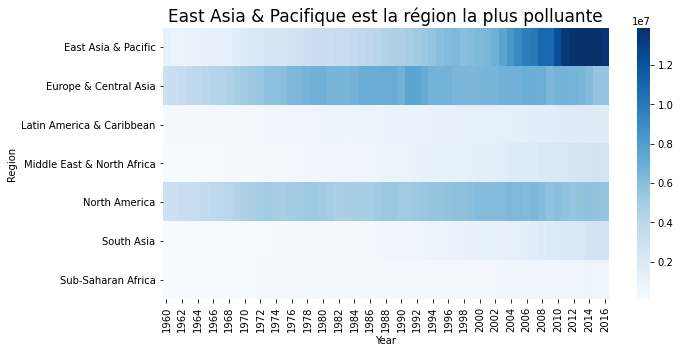

In [36]:
plt.figure(figsize=(10,5))
h1 =sns.heatmap(df_co2_region_year_pivot, cmap="Blues")
h1.set(title='East Asia & Pacifique est la région la plus polluante')
h1.title.set_size(17)

### Evolution des émissions de CO2 par niveau de Income

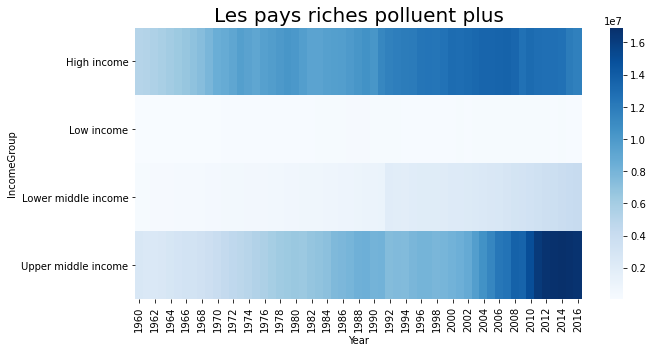

In [37]:
plt.figure(figsize=(10,5))
g = sns.heatmap(df_co2_Incomegroup_year_pivot, cmap="Blues")
g.set(title='Les pays riches polluent plus')
g.title.set_size(20)

In [38]:
df_co2_Incomegroup_year.head(2)
# g.set_xticklabels(g.get_xticklabels(), rotation=30)

,IncomeGroup,Year,CO2_IncomeGroup_Year
0,Low income,1960,36460.981
218,Low income,1961,39706.276


[Text(0, 0, '36460'),
 Text(0, 0, '39706'),
 Text(0, 0, '43934'),
 Text(0, 0, '46823'),
 Text(0, 0, '51437'),
 Text(0, 0, '61011'),
 Text(0, 0, '66545'),
 Text(0, 0, '72001'),
 Text(0, 0, '83519'),
 Text(0, 0, '92525')]

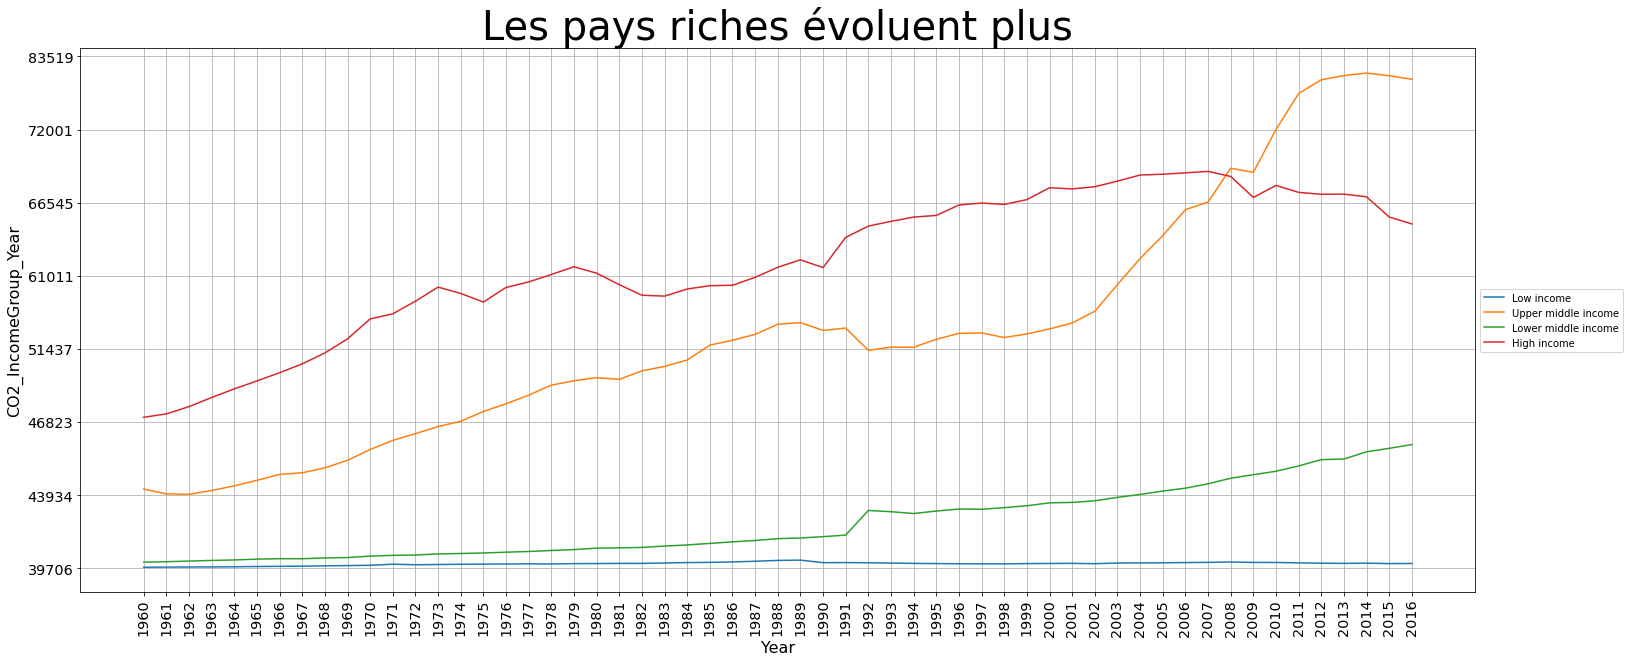

In [39]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_co2_Incomegroup_year, x="Year", y="CO2_IncomeGroup_Year", hue="IncomeGroup")
labels = df_co2_Incomegroup_year["Year"].unique()
labelsy=df_co2_Incomegroup_year["CO2_IncomeGroup_Year"].unique()
# g.set_xticks(len(labels))
g.set(title='Les pays riches évoluent plus')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
#g.legend(fontsize=500) # using a size in points
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')


[Text(0, 0, '151645'),
 Text(0, 0, '162624'),
 Text(0, 0, '179019'),
 Text(0, 0, '194453'),
 Text(0, 0, '191982'),
 Text(0, 0, '209767'),
 Text(0, 0, '216364'),
 Text(0, 0, '219829'),
 Text(0, 0, '241530'),
 Text(0, 0, '244372')]

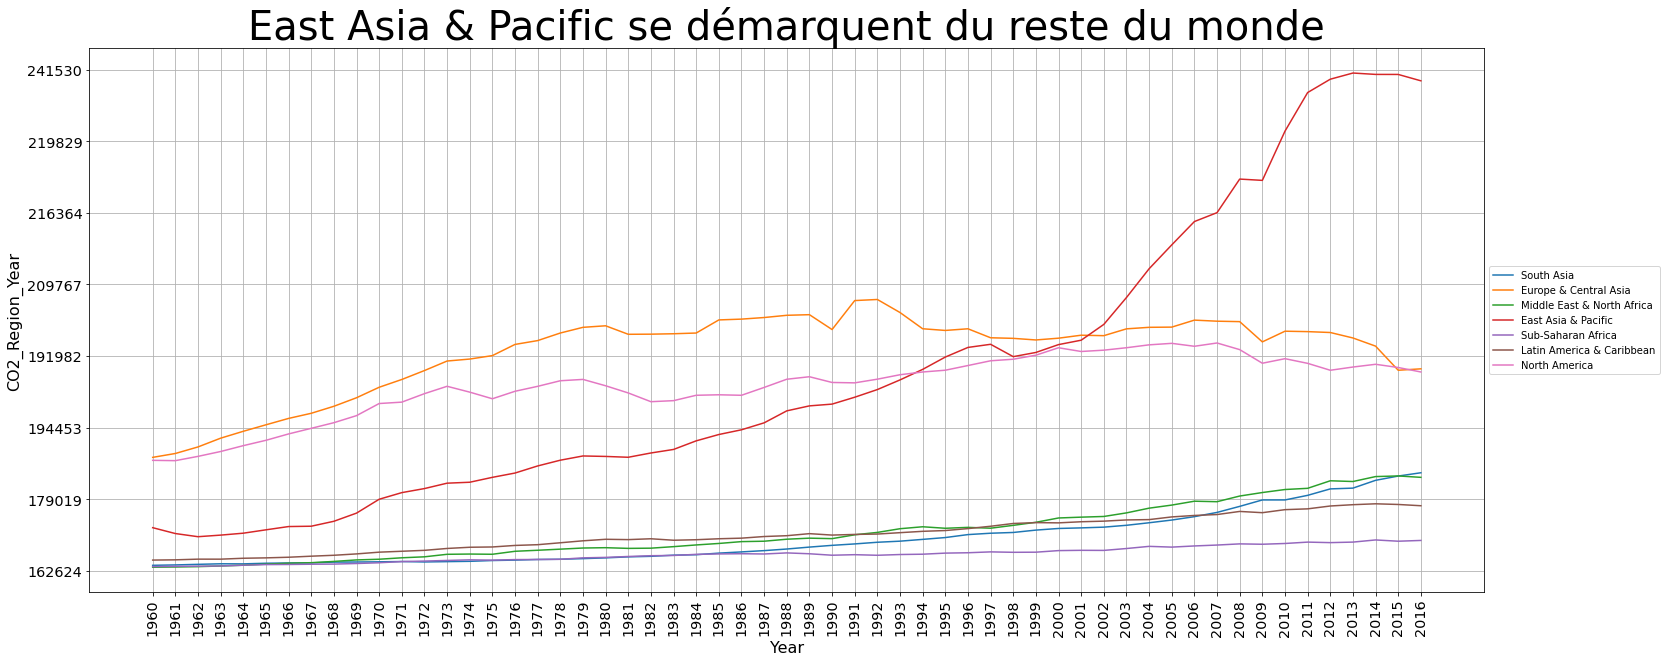

In [40]:
plt.figure(figsize=(25,10))
g = sns.lineplot(data=df_co2_region_year, x="Year", y="CO2_Region_Year", hue="Region")
labels = df_co2_region_year["Year"].unique()
labelsy=df_co2_region_year["CO2_Region_Year"].unique()
g.set(title='East Asia & Pacific se démarquent du reste du monde')
g.title.set_size(40)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')

In [41]:
df1['Country Name'] = df1['Country Name'].astype("category")

In [42]:
df1.dtypes

Country Name      category
Country Code        object
Indicator Name      object
Indicator Code      object
1960               float64
                    ...   
2012               float64
2013               float64
2014               float64
2015               float64
2016               float64
Length: 61, dtype: object

In [43]:
df_co2.shape

(218, 61)

In [44]:
df_co2_melt.head(2)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276


In [45]:
df_pib.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,AFG,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.881570e+10
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857338e+09,1.897050e+09,2.097326e+09,2.080796e+09,2.051236e+09,2.253090e+09,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199643e+09,2.258516e+09,2.545967e+09,3.212119e+09,3.480355e+09,3.922099e+09,4.348070e+09,5.611492e+09,7.184681e+09,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,1.204422e+10,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.861921e+07,8.940982e+07,1.134082e+08,1.508201e+08,1.865587e+08,2.201272e+08,2.272810e+08,2.540202e+08,3.080089e+08,4.115783e+08,4.464161e+08,3.889587e+08,3.758960e+08,3.278618e+08,3.300707e+08,3.467380e+08,4.820006e+08,6.113164e+08,7.214259e+08,7.954493e+08,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,1.429049e+09,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


In [46]:
df_pib_melt = df_pib.melt(id_vars=["Country Code"])

In [47]:
df_pib_melt.head()

,Country Code,variable,value
0,ABW,1960,NaN
1,AFG,1960,537777811.1
2,AGO,1960,NaN
3,ALB,1960,NaN
4,AND,1960,NaN


In [48]:
df_pib_melt.columns = ["Country Code", "Year", "PIB"]

In [49]:
df_pop_melt = df_pop.melt(id_vars=["Country Code"])

In [50]:
df_pop_melt.columns = ["Country Code", "Year", "Population"]

In [51]:
df_pib_melt.head(2)

,Country Code,Year,PIB
0,ABW,1960,NaN
1,AFG,1960,537777811.1


In [52]:
df_pop_melt.head(2)

,Country Code,Year,Population
0,ABW,1960,54211.0
1,AFG,1960,8996973.0


In [53]:
df_srf.columns = ["Country Code", "Surface"]

In [54]:
print(df_pib_melt.shape)
df_pib_melt = df_pib_melt.merge(df_srf, how="left", on="Country Code")
print(df_pib_melt.shape)

(15840, 3)
(15840, 4)


In [55]:
print(df_pib_melt.shape)
df_pib_melt = df_pib_melt.merge(df_pop_melt, how="left", on=["Country Code", "Year"])
print(df_pib_melt.shape)

(15840, 4)
(15840, 5)


In [56]:
print(df_co2_melt.shape)
df_all = df_co2_melt.merge(df_pib_melt, how="left", on=["Country Code", "Year"])
print(df_all.shape)

(12426, 8)
(12426, 11)


In [57]:
df_co2_melt.head(2)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981
218,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276


In [58]:
df_pib_melt.head(2)

,Country Code,Year,PIB,Surface,Population
0,ABW,1960,NaN,180.0,54211.0
1,AFG,1960,537777811.1,652860.0,8996973.0


In [59]:
df_all['PIB/Capita'] = df_all['PIB']/df_all['Population']

In [60]:
df_all['CO2/Capita'] = df_all['CO2']/df_all['Population']

In [61]:
df_all.head(100)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita
0,Afghanistan,AFG,South Asia,Low income,1960,414.371,151645.118,36460.981,5.377778e+08,652860.0,8996973.0,59.773194,0.000046
1,Afghanistan,AFG,South Asia,Low income,1961,491.378,162624.116,39706.276,5.488889e+08,652860.0,9169410.0,59.860874,0.000054
2,Afghanistan,AFG,South Asia,Low income,1962,689.396,179019.273,43934.327,5.466667e+08,652860.0,9351441.0,58.458015,0.000074
3,Afghanistan,AFG,South Asia,Low income,1963,707.731,194453.676,46823.923,7.511112e+08,652860.0,9543205.0,78.706388,0.000074
4,Afghanistan,AFG,South Asia,Low income,1964,839.743,191982.118,51437.009,8.000000e+08,652860.0,9744781.0,82.095231,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Albania,ALB,Europe & Central Asia,Upper middle income,1998,1752.826,6491246.393,7889209.469,2.545967e+09,28750.0,3128530.0,813.790263,0.000560
96,Albania,ALB,Europe & Central Asia,Upper middle income,1999,2984.938,6446288.973,8013473.098,3.212119e+09,28750.0,3108778.0,1033.241693,0.000960
97,Albania,ALB,Europe & Central Asia,Upper middle income,2000,3021.608,6495910.817,8183970.263,3.480355e+09,28750.0,3089027.0,1126.683318,0.000978
98,Albania,ALB,Europe & Central Asia,Upper middle income,2001,3223.293,6578909.695,8386014.629,3.922099e+09,28750.0,3060173.0,1281.659393,0.001053


In [62]:
df_all.columns

Index(['Country', 'Country Code', 'Region', 'IncomeGroup', 'Year', 'CO2',
       'CO2_Region_Year', 'CO2_IncomeGroup_Year', 'PIB', 'Surface',
       'Population', 'PIB/Capita', 'CO2/Capita'],
      dtype='object')

In [63]:
print(df_all.shape)
df_corr = df_all[['CO2', 'PIB', 'Surface', 'Population', 'PIB/Capita', 'CO2/Capita']].drop_duplicates()
print(df_corr.shape)

(12426, 13)
(12396, 6)


In [64]:
df_corr.head()

,CO2,PIB,Surface,Population,PIB/Capita,CO2/Capita
0,414.371,537777811.1,652860.0,8996973.0,59.773194,0.000046
1,491.378,548888895.6,652860.0,9169410.0,59.860874,0.000054
2,689.396,546666677.8,652860.0,9351441.0,58.458015,0.000074
3,707.731,751111191.1,652860.0,9543205.0,78.706388,0.000074
4,839.743,800000044.4,652860.0,9744781.0,82.095231,0.000086


# EXTRACT COUNTRIES WITH THEIR CORRELATION CO2/PIB

In [65]:
countries = df_all["Country"].unique().tolist()

In [66]:
df_Alemania = df_all[df_all["Country"]=="Germany"][["Country", 'Year', 'CO2', 'PIB']].drop_duplicates()

In [67]:
print(df_Alemania)

      Country  Year         CO2           PIB
4161  Germany  1960         NaN           NaN
4162  Germany  1961         NaN           NaN
4163  Germany  1962         NaN           NaN
4164  Germany  1963         NaN           NaN
4165  Germany  1964         NaN           NaN
4166  Germany  1965         NaN           NaN
4167  Germany  1966         NaN           NaN
4168  Germany  1967         NaN           NaN
4169  Germany  1968         NaN           NaN
4170  Germany  1969         NaN           NaN
4171  Germany  1970         NaN  2.158380e+11
4172  Germany  1971         NaN  2.499850e+11
4173  Germany  1972         NaN  2.998020e+11
4174  Germany  1973         NaN  3.983740e+11
4175  Germany  1974         NaN  4.453030e+11
4176  Germany  1975         NaN  4.906370e+11
4177  Germany  1976         NaN  5.197540e+11
4178  Germany  1977         NaN  6.004980e+11
4179  Germany  1978         NaN  7.404700e+11
4180  Germany  1979         NaN  8.813450e+11
4181  Germany  1980         NaN  9

In [68]:
positive_dict_of_countries_according_PIB_CO2_corr = {}
negative_dict_of_countries_according_PIB_CO2_corr = {}
indxP = 0
indxN = 0
for country in countries:
    temp = df_all[df_all["Country"]==country][["Country", 'CO2', 'PIB']].drop_duplicates()
    if temp.corr()["PIB"][0]>0:
        positive_dict_of_countries_according_PIB_CO2_corr[indxP] = (country , temp.corr()["PIB"][0])
        indxP += 1
    else:
        negative_dict_of_countries_according_PIB_CO2_corr[indxN] = (country , temp.corr()["PIB"][0])
        indxN += 1
        

In [69]:
print(positive_dict_of_countries_according_PIB_CO2_corr)

{0: ('Afghanistan', 0.9459049257219457), 1: ('Albania', 0.02734881790906836), 2: ('Algeria', 0.8677806234395782), 3: ('Andorra', 0.6005072026004475), 4: ('Angola', 0.9653740803699465), 5: ('Antigua and Barbuda', 0.7521599058322416), 6: ('Argentina', 0.9097698000239125), 7: ('Armenia', 0.8022491261311975), 8: ('Aruba', 0.6243242694770029), 9: ('Australia', 0.8355759939137194), 10: ('Austria', 0.7296779991405956), 11: ('Azerbaijan', 0.0026874978521231087), 12: ('Bahrain', 0.9596994736138096), 13: ('Bangladesh', 0.9427828221398199), 14: ('Barbados', 0.934998791499511), 15: ('Belarus', 0.09358084156429206), 16: ('Belize', 0.9400001048946862), 17: ('Benin', 0.9845999520949712), 18: ('Bermuda', 0.6366096568019373), 19: ('Bhutan', 0.9237900385594157), 20: ('Bolivia', 0.9390685565950042), 21: ('Bosnia and Herzegovina', 0.9404237230589285), 22: ('Botswana', 0.9378824465943261), 23: ('Brazil', 0.9099752177309378), 24: ('Brunei Darussalam', 0.4715824833401096), 25: ('Burkina Faso', 0.976984530138

In [70]:
print(negative_dict_of_countries_according_PIB_CO2_corr)

{0: ('American Samoa', nan), 1: ('Bahamas, The', -0.29603526288793774), 2: ('Belgium', -0.4007155968723603), 3: ('British Virgin Islands', nan), 4: ('Bulgaria', -0.4192363675704775), 5: ('Channel Islands', nan), 6: ('Czech Republic', -0.7810220693917245), 7: ('Denmark', -0.6453054742543956), 8: ('Eritrea', -0.5866735971161017), 9: ('Faroe Islands', -0.5700057273305719), 10: ('France', -0.3667580001224113), 11: ('Germany', -0.8811905911409774), 12: ('Gibraltar', nan), 13: ('Guam', nan), 14: ('Hungary', -0.7729138098632526), 15: ('Isle of Man', nan), 16: ("Korea, Dem. People's Rep.", nan), 17: ('Kosovo', -0.12098442790303736), 18: ('Latvia', -0.2329525110601544), 19: ('Liechtenstein', -0.7070357058665592), 20: ('Lithuania', -0.3257263204202999), 21: ('Luxembourg', -0.2846726811795975), 22: ('Moldova', -0.22093259350170624), 23: ('Monaco', nan), 24: ('North Macedonia', -0.8555379691517153), 25: ('Northern Mariana Islands', nan), 26: ('Poland', -0.6749288695135096), 27: ('Puerto Rico', nan

In [71]:
for i in negative_dict_of_countries_according_PIB_CO2_corr:
    print(negative_dict_of_countries_according_PIB_CO2_corr.get(i))

('American Samoa', nan)
('Bahamas, The', -0.29603526288793774)
('Belgium', -0.4007155968723603)
('British Virgin Islands', nan)
('Bulgaria', -0.4192363675704775)
('Channel Islands', nan)
('Czech Republic', -0.7810220693917245)
('Denmark', -0.6453054742543956)
('Eritrea', -0.5866735971161017)
('Faroe Islands', -0.5700057273305719)
('France', -0.3667580001224113)
('Germany', -0.8811905911409774)
('Gibraltar', nan)
('Guam', nan)
('Hungary', -0.7729138098632526)
('Isle of Man', nan)
("Korea, Dem. People's Rep.", nan)
('Kosovo', -0.12098442790303736)
('Latvia', -0.2329525110601544)
('Liechtenstein', -0.7070357058665592)
('Lithuania', -0.3257263204202999)
('Luxembourg', -0.2846726811795975)
('Moldova', -0.22093259350170624)
('Monaco', nan)
('North Macedonia', -0.8555379691517153)
('Northern Mariana Islands', nan)
('Poland', -0.6749288695135096)
('Puerto Rico', nan)
('Romania', -0.586926254815409)
('Russian Federation', -0.16202422559854715)
('San Marino', nan)
('Serbia', -0.36233009538711436

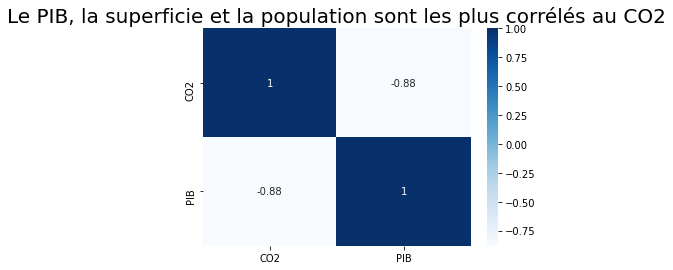

In [72]:
g=sns.heatmap(df_Alemania.corr(), annot=True, cmap="Blues")
g.set(title='Le PIB, la superficie et la population sont les plus corrélés au CO2')
g.title.set_size(20)

In [73]:
df_Alemania.corr()["PIB"][0]

-0.8811905911409774

# Analyse bivariée

### Matrice de correlation

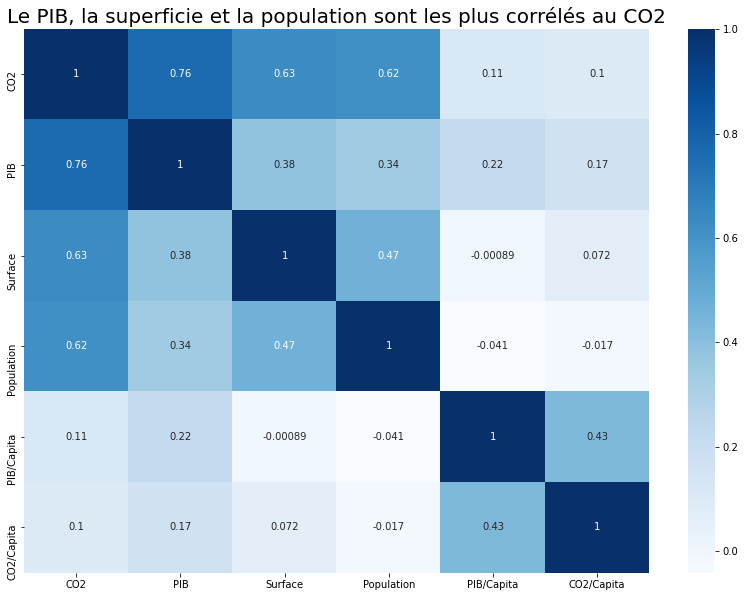

In [74]:
plt.figure(figsize=(14,10))
g=sns.heatmap(df_corr.corr(), annot=True, cmap="Blues")
g.set(title='Le PIB, la superficie et la population sont les plus corrélés au CO2')
g.title.set_size(20)

### Tableau de contingence 2016

In [75]:
df_cont16 = df_all[df_all['Year']=="2016"]

t_contingence2016 = pd.crosstab(df_cont16['Region'],
                            df_cont16['IncomeGroup'], 
                               margins = False)
print(t_contingence2016)

IncomeGroup                 High income  ...  Upper middle income
Region                                   ...                     
East Asia & Pacific                  14  ...                   10
Europe & Central Asia                38  ...                   15
Latin America & Caribbean            17  ...                   20
Middle East & North Africa            8  ...                    5
North America                         3  ...                    0
South Asia                            0  ...                    1
Sub-Saharan Africa                    2  ...                    5

[7 rows x 4 columns]


### Tableau de contingence 1960

In [76]:
df_cont60 = df_all[df_all['Year']=="1960"]

t_contingence1960 = pd.crosstab(df_cont60['Region'],
                            df_cont60['IncomeGroup'], 
                               margins = False)
print(t_contingence1960)

IncomeGroup                 High income  ...  Upper middle income
Region                                   ...                     
East Asia & Pacific                  14  ...                   10
Europe & Central Asia                38  ...                   15
Latin America & Caribbean            17  ...                   20
Middle East & North Africa            8  ...                    5
North America                         3  ...                    0
South Asia                            0  ...                    1
Sub-Saharan Africa                    2  ...                    5

[7 rows x 4 columns]


## Nuage des points

In [77]:
df_all2016 = df_all[df_all["Year"]=="2016"]

## Bivarie entre PIB et CO2

<Figure size 1080x720 with 0 Axes>

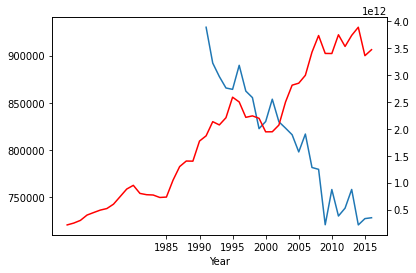

In [78]:
plt.figure(figsize=(15,10))
ax = df_Alemania.plot(x="Year", y="CO2", legend=False)
ax.set_label
ax2 = ax.twinx()
df_Alemania.plot(x="Year", y="PIB", ax=ax2, legend=False, color="r")
plt.show()

In [79]:
df_China = df_all[df_all["Country"]=="China"][["Country", 'Year', 'CO2', 'PIB']].drop_duplicates()

In [80]:
print(df_China)

     Country  Year           CO2           PIB
2337   China  1960  7.807263e+05  5.971647e+10
2338   China  1961  5.520668e+05  5.005687e+10
2339   China  1962  4.403590e+05  4.720936e+10
2340   China  1963  4.366957e+05  5.070680e+10
2341   China  1964  4.369230e+05  5.970834e+10
2342   China  1965  4.759729e+05  7.043627e+10
2343   China  1966  5.227895e+05  7.672029e+10
2344   China  1967  4.332340e+05  7.288163e+10
2345   China  1968  4.689286e+05  7.084654e+10
2346   China  1969  5.772371e+05  7.970591e+10
2347   China  1970  7.716175e+05  9.260297e+10
2348   China  1971  8.766330e+05  9.980096e+10
2349   China  1972  9.315757e+05  1.136880e+11
2350   China  1973  9.685427e+05  1.385440e+11
2351   China  1974  9.880145e+05  1.441820e+11
2352   China  1975  1.145607e+06  1.634320e+11
2353   China  1976  1.196194e+06  1.539400e+11
2354   China  1977  1.310311e+06  1.749380e+11
2355   China  1978  1.462169e+06  1.495410e+11
2356   China  1979  1.494860e+06  1.782810e+11
2357   China 

<Figure size 1080x720 with 0 Axes>

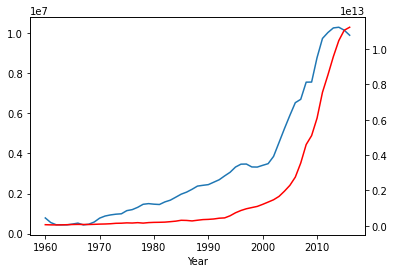

In [81]:
plt.figure(figsize=(15,10))
ax = df_China.plot(x="Year", y="CO2", legend=False)
ax2 = ax.twinx()
df_China.plot(x="Year", y="PIB", ax=ax2, legend=False, color="r")
plt.show()

### Hypothèse : les points orange representent la Chine et les rouges les Etats Unis

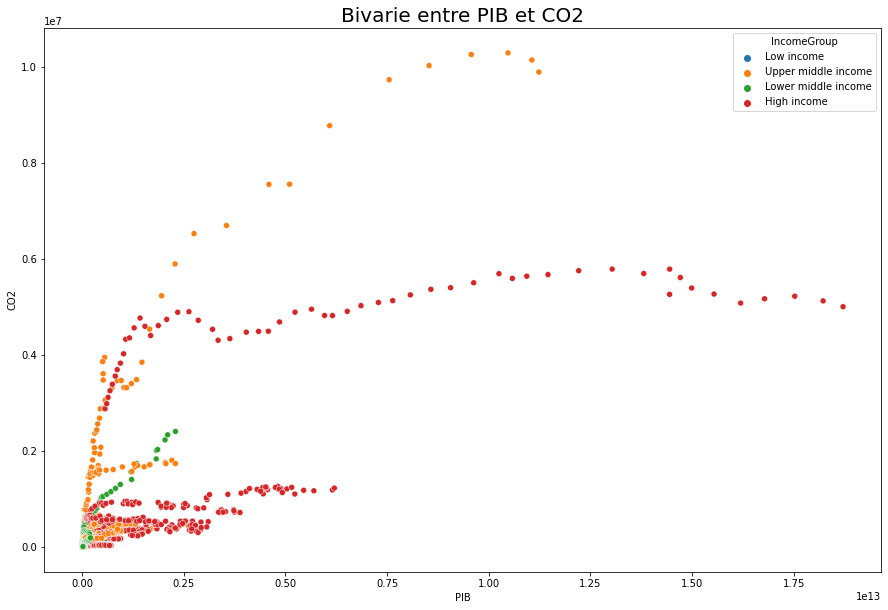

In [82]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all, x="PIB", y="CO2", hue="IncomeGroup")
g.set(title='Bivarie entre PIB et CO2')
g.title.set_size(20)

### le même pour 2016

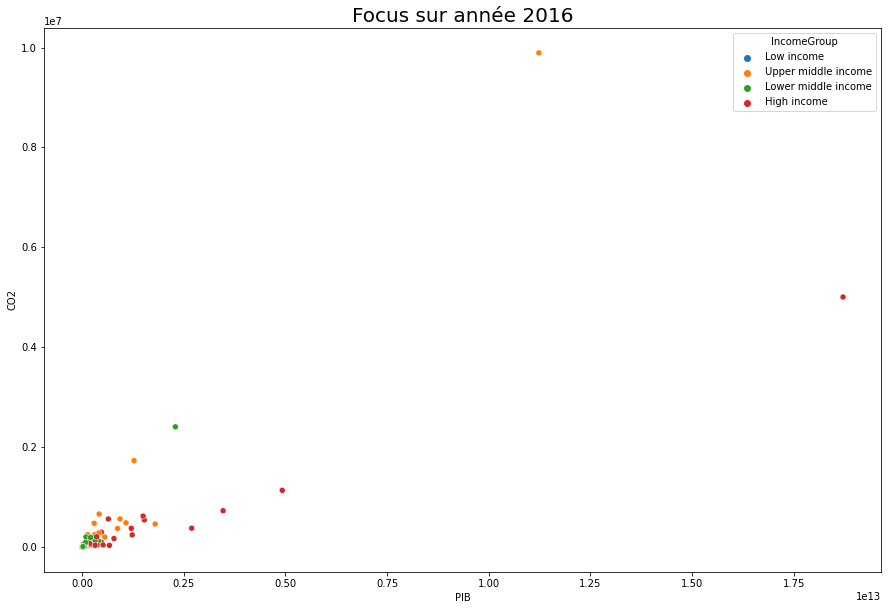

In [83]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all2016, x="PIB", y="CO2", hue="IncomeGroup")
g.set(title='Focus sur année 2016')
g.title.set_size(20)

#### On voit qu'il y a deux pays qui sont des valeurs Extremes (outliers)

## Bivarie entre Population et CO2

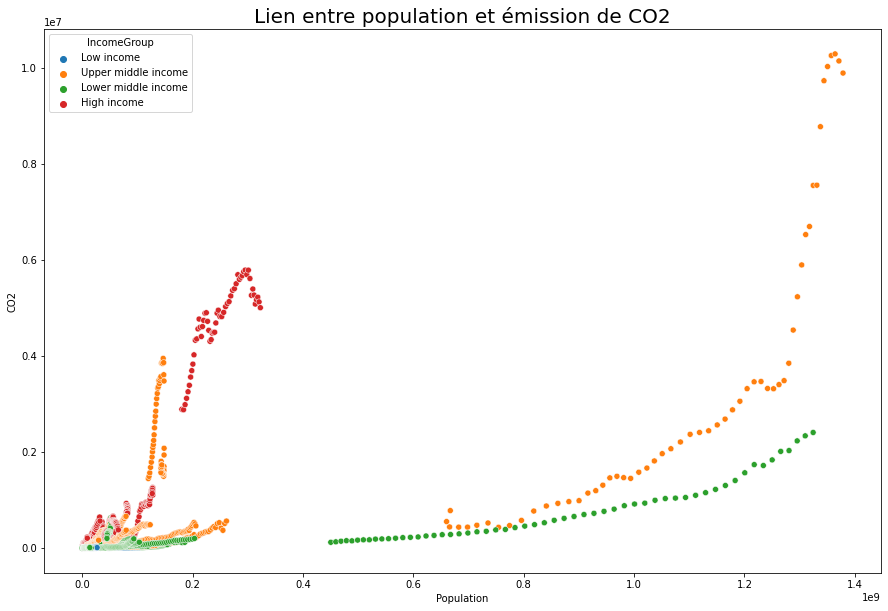

In [84]:
plt.figure(figsize=(15,10))
g=sns.scatterplot(data=df_all, x="Population", y="CO2", hue="IncomeGroup")
g.set(title='Lien entre population et émission de CO2')
g.title.set_size(20)

## Top 10 des pays les plus polluants en 2016

In [85]:
df_all2016['pctg_CO2_2016'] = (df_all2016['CO2'] / df_all2016['CO2'].sum())*100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
df_all2016 = df_all2016.sort_values(by="pctg_CO2_2016", ascending = False)

In [87]:
df_all2016.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,pctg_CO2_2016
2393,China,CHN,East Asia & Pacific,Upper middle income,2016,9893037.952,1.368487e+07,1.671832e+07,1.123330e+13,9600012.9,1.378665e+09,8147.954724,0.007176,30.081164
11855,United States,USA,North America,High income,2016,5006302.077,5.551809e+06,1.177276e+07,1.871500e+13,9831510.0,3.229413e+08,57951.706278,0.015502,15.222361
5129,India,IND,South Asia,Lower middle income,2016,2407671.526,2.736913e+06,4.229048e+06,2.294800e+12,3287259.0,1.324510e+09,1732.565788,0.001818,7.320862
9290,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2016,1732026.776,5.639908e+06,1.671832e+07,1.276790e+12,17098250.0,1.443424e+08,8845.564620,0.011999,5.266469
5642,Japan,JPN,East Asia & Pacific,High income,2016,1135886.253,1.368487e+07,1.177276e+07,4.922540e+12,377974.0,1.269945e+08,38761.832785,0.008944,3.453821


### Conserver que les dix les plus polluants en 2016

In [88]:
df_top10 = df_all2016.head(10)

In [89]:
df_top10['Country'].unique().tolist()

['China',
 'United States',
 'India',
 'Russian Federation',
 'Japan',
 'Germany',
 'Iran, Islamic Rep.',
 'Korea, Rep.',
 'Saudi Arabia',
 'Indonesia']

In [90]:
df_all_top = df_all[df_all['Country'].isin(df_top10['Country'].unique().tolist())]

In [91]:
df_all_top.head(10)

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2708981.582,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2543500.873,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2530285.005,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2659411.076,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2818760.561,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626
2342,China,CHN,East Asia & Pacific,Upper middle income,1965,475972.933,1142956.229,3008249.119,7.043627e+10,9600012.9,715185000.0,98.486778,0.000666
2343,China,CHN,East Asia & Pacific,Upper middle income,1966,522789.522,1234513.885,3209105.377,7.672029e+10,9600012.9,735400000.0,104.324566,0.000711
2344,China,CHN,East Asia & Pacific,Upper middle income,1967,433234.048,1243828.065,3265848.535,7.288163e+10,9600012.9,754550000.0,96.589532,0.000574
2345,China,CHN,East Asia & Pacific,Upper middle income,1968,468928.626,1381505.580,3432121.316,7.084654e+10,9600012.9,774510000.0,91.472718,0.000605
2346,China,CHN,East Asia & Pacific,Upper middle income,1969,577237.138,1609468.302,3689918.750,7.970591e+10,9600012.9,796025000.0,100.129903,0.000725


In [92]:
df_all_top['CO2/surface'] = df_all_top['CO2']/df_all_top['Surface']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
df_all_top['CO2/population'] = df_all_top['CO2']/df_all_top['Population']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
df_all_top = df_all_top.drop_duplicates()

In [95]:
df_all_top.head()

,Country,Country Code,Region,IncomeGroup,Year,CO2,CO2_Region_Year,CO2_IncomeGroup_Year,PIB,Surface,Population,PIB/Capita,CO2/Capita,CO2/surface,CO2/population
2337,China,CHN,East Asia & Pacific,Upper middle income,1960,780726.302,1202974.018,2708981.582,5.971647e+10,9600012.9,667070000.0,89.520542,0.001170,0.081326,0.001170
2338,China,CHN,East Asia & Pacific,Upper middle income,1961,552066.850,1039169.128,2543500.873,5.005687e+10,9600012.9,660330000.0,75.805838,0.000836,0.057507,0.000836
2339,China,CHN,East Asia & Pacific,Upper middle income,1962,440359.029,950919.106,2530285.005,4.720936e+10,9600012.9,665770000.0,70.909412,0.000661,0.045871,0.000661
2340,China,CHN,East Asia & Pacific,Upper middle income,1963,436695.696,995212.799,2659411.076,5.070680e+10,9600012.9,682335000.0,74.313643,0.000640,0.045489,0.000640
2341,China,CHN,East Asia & Pacific,Upper middle income,1964,436923.050,1048960.018,2818760.561,5.970834e+10,9600012.9,698355000.0,85.498555,0.000626,0.045513,0.000626


## Evolution des emissions de CO2/surface du top 10 de 2016

[Text(0, 0, '151645'),
 Text(0, 0, '162624'),
 Text(0, 0, '179019'),
 Text(0, 0, '194453'),
 Text(0, 0, '191982'),
 Text(0, 0, '209767'),
 Text(0, 0, '216364'),
 Text(0, 0, '219829'),
 Text(0, 0, '241530')]

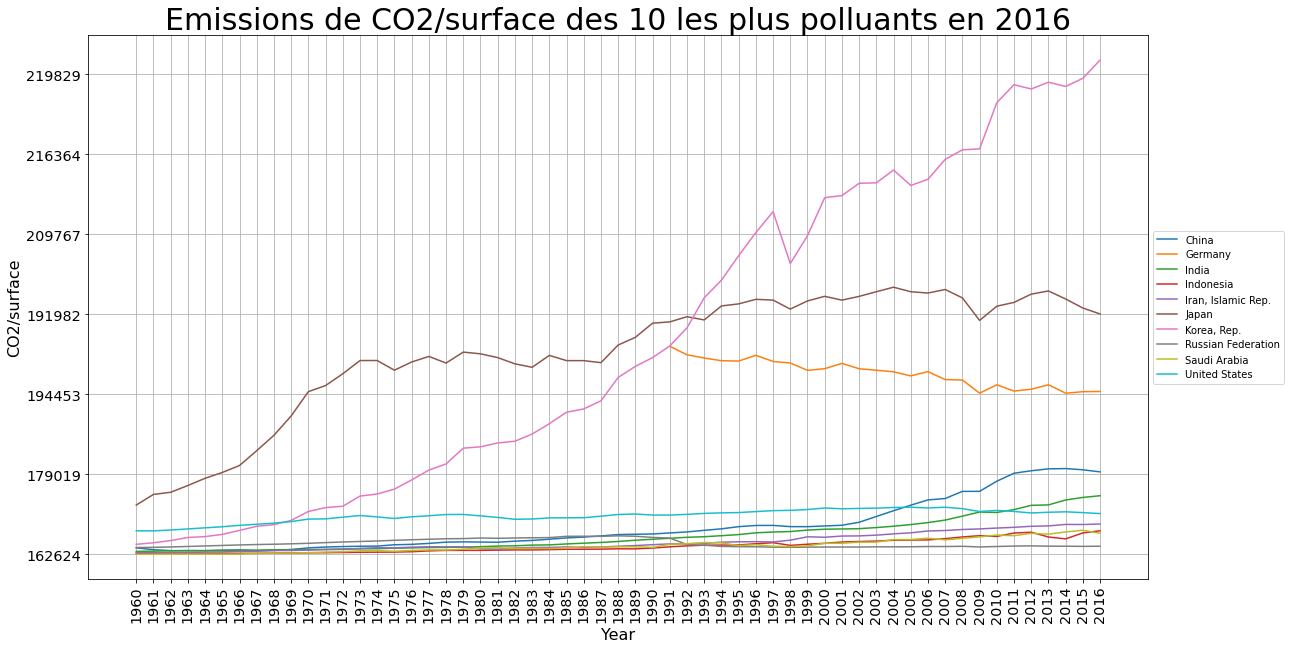

In [96]:
plt.figure(figsize=(19,10))

g = sns.lineplot(data=df_all_top, x="Year", y="CO2/surface", hue="Country")

g.set(title='Emissions de CO2/surface des 10 les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
# g.legend(fontsize=100)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')



## Evolution des emissions de CO2/population du top 10 de 2016

[Text(0, 0, '151645'),
 Text(0, 0, '162624'),
 Text(0, 0, '179019'),
 Text(0, 0, '194453'),
 Text(0, 0, '191982'),
 Text(0, 0, '209767'),
 Text(0, 0, '216364'),
 Text(0, 0, '219829')]

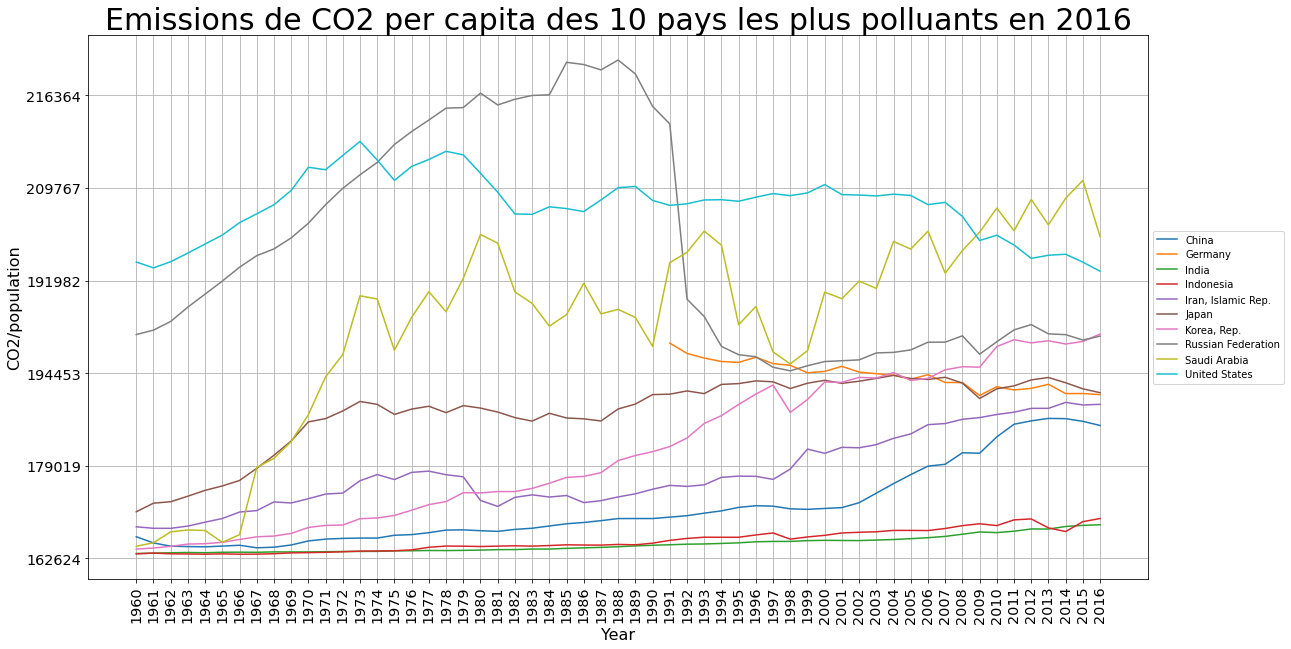

In [97]:
plt.figure(figsize=(19,10))
g = sns.lineplot(data=df_all_top, x="Year", y="CO2/population", hue="Country")

g.set(title='Emissions de CO2 per capita des 10 pays les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')


[Text(0, 0, '151645'),
 Text(0, 0, '162624'),
 Text(0, 0, '179019'),
 Text(0, 0, '194453'),
 Text(0, 0, '191982'),
 Text(0, 0, '209767'),
 Text(0, 0, '216364'),
 Text(0, 0, '219829')]

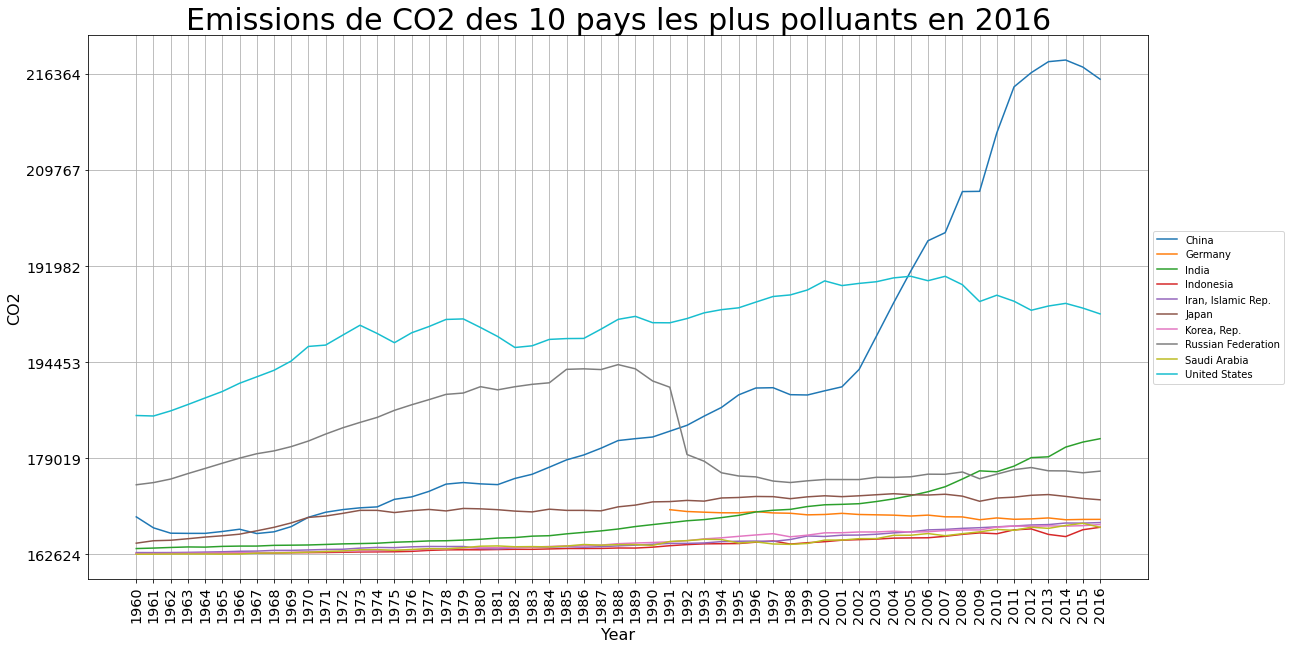

In [98]:
plt.figure(figsize=(19,10))
g = sns.lineplot(data=df_all_top, x="Year", y="CO2", hue="Country")

g.set(title='Emissions de CO2 des 10 pays les plus polluants en 2016')
g.title.set_size(30)
g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)
g.legend(fontsize=50)
g.legend(fontsize="larger")
g.legend(loc='center left',bbox_to_anchor=(1, 0.5))
g.grid()
g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')



In [99]:
df_top5 = df_all2016.head(5)


In [100]:
df_top5['Country'].unique().tolist()

['China', 'United States', 'India', 'Russian Federation', 'Japan']

In [101]:
df_top5['Country'].unique().tolist()

['China', 'United States', 'India', 'Russian Federation', 'Japan']

In [102]:
df_top5['CO2'].unique().tolist()

[9893037.952, 5006302.077, 2407671.526, 1732026.7759999998, 1135886.253]

In [103]:
df_top5['PIB'].unique().tolist()

[11233300000000.0,
 18715000000000.0,
 2294800000000.0,
 1276790000000.0,
 4922540000000.0]

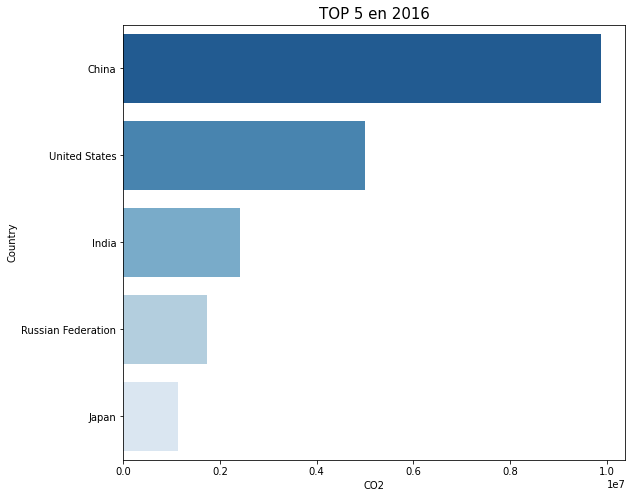

In [104]:
plt.figure(figsize=(9,8))
sns.set_color_codes("pastel")
g = sns.barplot(x="CO2", y="Country", data=df_top5, palette="Blues_r")
g.set(title='TOP 5 en 2016')
g.title.set_size(15)


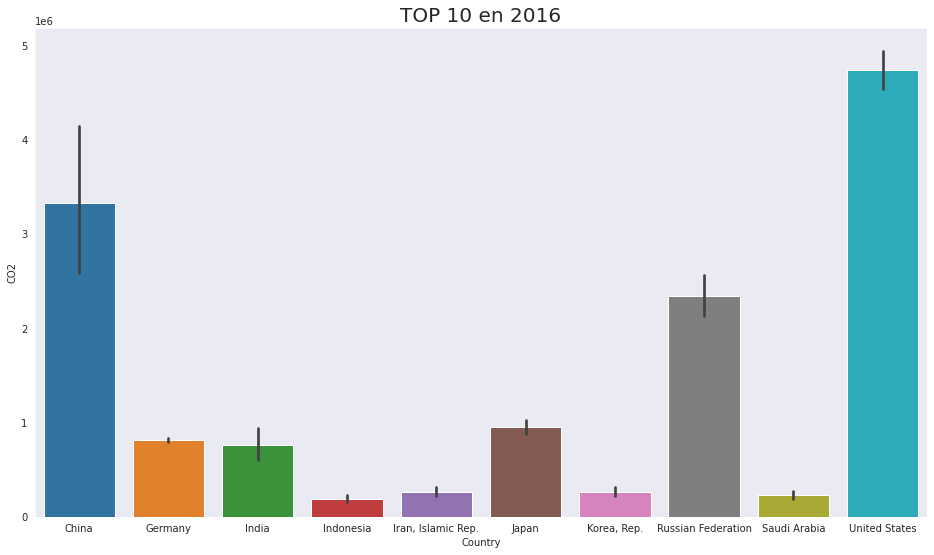

In [105]:
plt.figure(figsize=(16,9))
sns.set_style("dark")
g = sns.barplot(x="Country", y="CO2", data=df_all_top)
g.set(title='TOP 10 en 2016')
g.title.set_size(20)


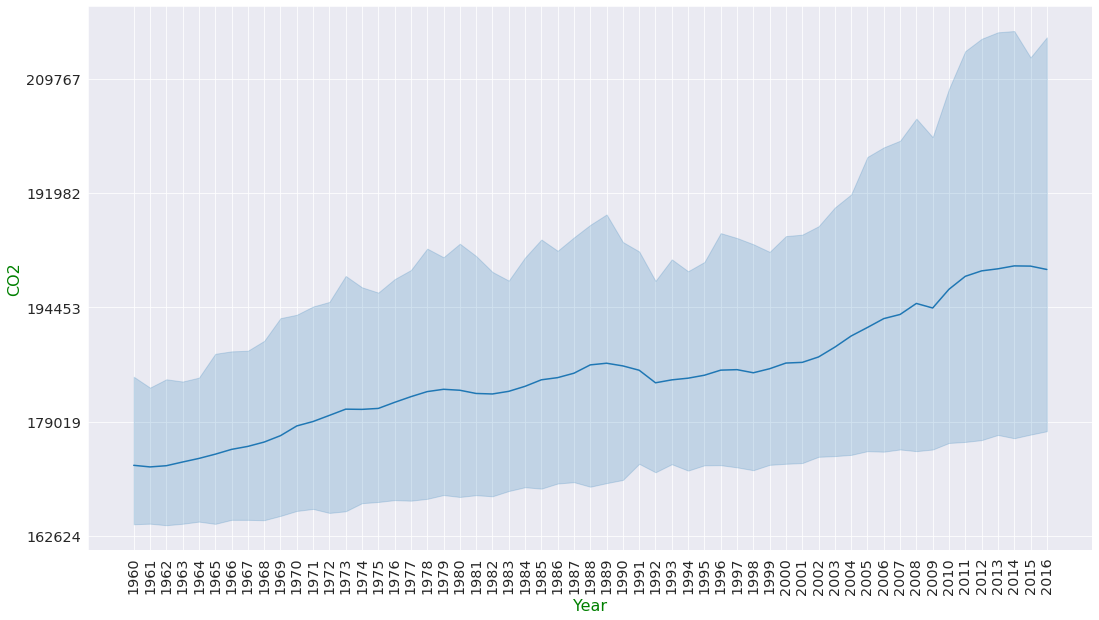

In [106]:
plt.figure(figsize=(18,10))
g = sns.lineplot(data=df_all_top, x="Year", y="CO2")
g.xaxis.label.set_color("green")
g.yaxis.label.set_color("green")

g.xaxis.label.set_size(16)
g.yaxis.label.set_size(16)

g.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
g.set_xticklabels(labels,  rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large')
g.set_yticklabels(labelsy.astype(int),
    fontweight='light',
    fontsize='x-large')

g.grid()

### Nouvelles données

In [235]:
df_export = pd.read_csv("/content/export.csv")
df_meta_export = pd.read_csv("/content/Metadata_Country_API_NE.EXP.GNFS.ZS_DS2_fr_csv_v2_2611262.csv")
#df_elec_charbon = pd.read_csv("/content/API_EG.ELC.COAL.ZS_DS2_fr_csv_v2_2615723.csv", sep=',')
df_elec_charbon = pd.read_csv("/content/production_elec_charbon-2.csv")

In [229]:
print(df_export)

                                   Country Name  ...             2020
0                                   Afghanistan  ...               ..
1                                       Albania  ...  3833486235.3721
2                                       Algeria  ...  44344416400.498
3                                American Samoa  ...               ..
4                                       Andorra  ...               ..
..                                          ...  ...              ...
261                          Sub-Saharan Africa  ...  464943250276.48
262  Sub-Saharan Africa (excluding high income)  ...  463942339933.61
263   Sub-Saharan Africa (IDA & IBRD countries)  ...  464943250276.48
264                         Upper middle income  ...               ..
265                                       World  ...   23900524949176

[266 rows x 14 columns]


In [223]:
df_export["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Is

In [200]:
df1_export_melt = df_export.melt(id_vars=["Country Name", "Country Code"])

In [201]:
df1_export_melt.head()

,Country Name,Country Code,variable,value
0,Afghanistan,AFG,1990,..
1,Albania,ALB,1990,..
2,Algeria,DZA,1990,45548737307.707
3,American Samoa,ASM,1990,..
4,Andorra,AND,1990,..


In [202]:
df1_export_melt.columns = ["Country", "Country Code", "Year", "Export"]

In [203]:
df1_export_melt = df1_export_melt.sort_values(by=["Country", "Year"])

In [204]:
df1_export_melt.head()

,Country,Country Code,Year,Export
0,Afghanistan,AFG,1990,..
266,Afghanistan,AFG,2000,..
532,Afghanistan,AFG,2011,..
798,Afghanistan,AFG,2012,..
1064,Afghanistan,AFG,2013,..


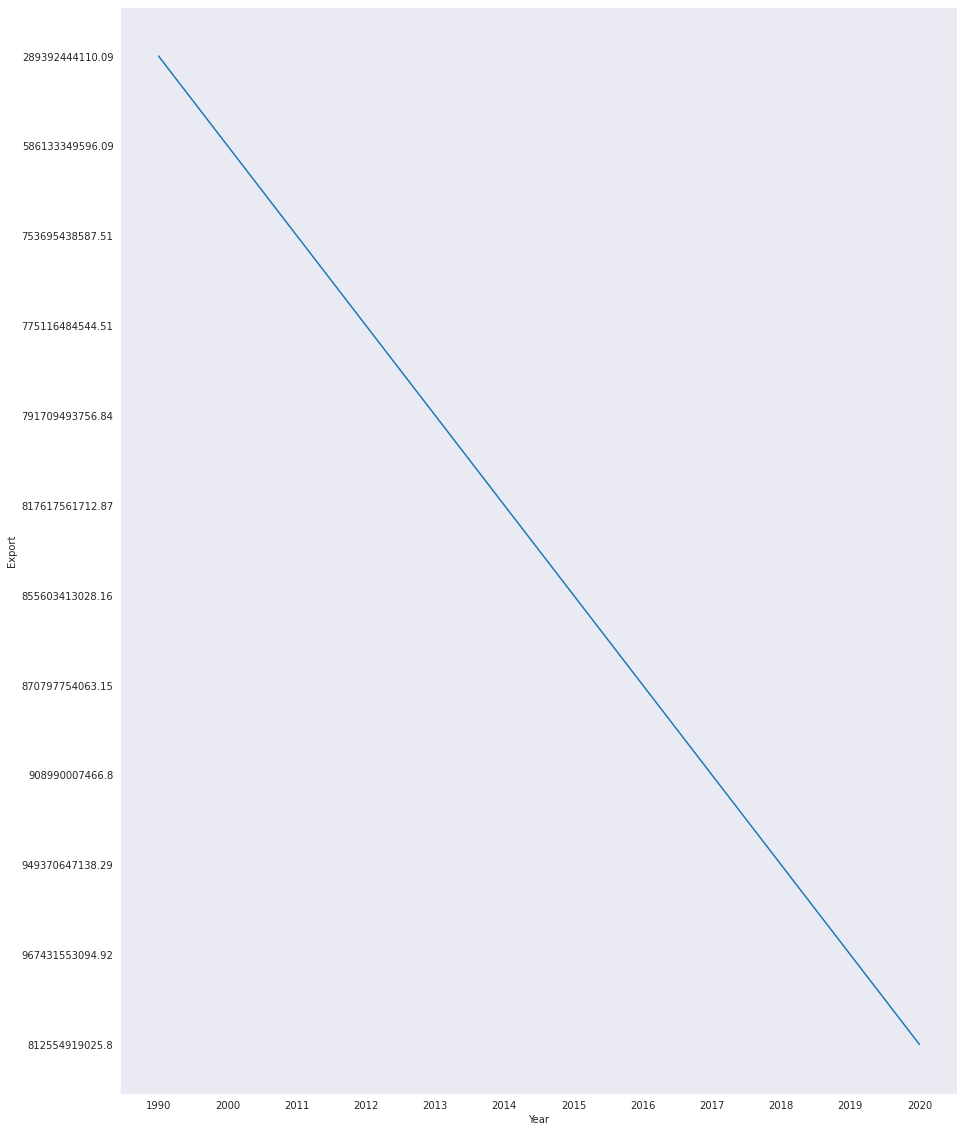

In [249]:
plt.figure(figsize=(15,20))
g = sns.lineplot(data=df_export_France, x="Year", y="Export")

In [211]:
df_export_France = df1_export_melt[df1_export_melt["Country"]=="France"][["Country", 'Year', 'Export']].drop_duplicates()

In [212]:
print(df_export_France)

     Country  Year           Export
68    France  1990  289392444110.09
334   France  2000  586133349596.09
600   France  2011  753695438587.51
866   France  2012  775116484544.51
1132  France  2013  791709493756.84
1398  France  2014  817617561712.87
1664  France  2015  855603413028.16
1930  France  2016  870797754063.15
2196  France  2017   908990007466.8
2462  France  2018  949370647138.29
2728  France  2019  967431553094.92
2994  France  2020   812554919025.8


In [257]:
df_elec_charbon = pd.read_csv("/content/production_elec_charbon-2.csv")

In [258]:
print(df_elec_charbon)

       Country Name Country Code  Indicator Code  ...       2014       2015  2016
0             Aruba          ABW  EG.ELC.COAL.ZS  ...        NaN        NaN   NaN
1               NaN          AFE  EG.ELC.COAL.ZS  ...  62.302325  61.204323   NaN
2       Afghanistan          AFG  EG.ELC.COAL.ZS  ...        NaN        NaN   NaN
3               NaN          AFW  EG.ELC.COAL.ZS  ...   0.326377   0.287308   NaN
4            Angola          AGO  EG.ELC.COAL.ZS  ...   0.000000   0.000000   NaN
..              ...          ...             ...  ...        ...        ...   ...
261          Kosovo          XKX  EG.ELC.COAL.ZS  ...  96.946284  97.466906   NaN
262  Yémen, Rép. du          YEM  EG.ELC.COAL.ZS  ...   0.000000   0.000000   NaN
263  Afrique du Sud          ZAF  EG.ELC.COAL.ZS  ...  93.101803  92.711238   NaN
264          Zambie          ZMB  EG.ELC.COAL.ZS  ...   0.000000   0.000000   NaN
265        Zimbabwe          ZWE  EG.ELC.COAL.ZS  ...  43.855974  46.781337   NaN

[266 rows x 60 

In [259]:
df_elec_charbon["Country Name"].unique()

array(['Aruba', nan, 'Afghanistan', 'Angola', 'Albanie', 'Andorre',
       'Le monde arabe', 'Émirats arabes unis', 'Argentine', 'Arménie',
       'Samoa américaines', 'Antigua-et-Barbuda', 'Australie', 'Autriche',
       'Azerbaïdjan', 'Burundi', 'Belgique', 'Bénin', 'Burkina Faso',
       'Bangladesh', 'Bulgarie', 'Bahreïn', 'Bahamas',
       'Bosnie-Herzégovine', 'Bélarus', 'Belize', 'Bermudes', 'Bolivie',
       'Brésil', 'Barbade', 'Brunéi Darussalam', 'Bhoutan', 'Botswana',
       'République centrafricaine', 'Canada',
       'Europe centrale et les pays baltes', 'Suisse',
       'Îles Anglo-Normandes', 'Chili', 'Chine', "Côte d'Ivoire",
       'Cameroun', 'Congo, République démocratique du',
       'Congo, République du', 'Colombie', 'Comores', 'Cabo Verde',
       'Costa Rica', 'Petits états des Caraïbes', 'Cuba', 'Curacao',
       'Îles Caïmans', 'Chypre', 'République tchèque', 'Allemagne',
       'Djibouti', 'Dominique', 'Danemark', 'République dominicaine',
       'Algérie',

In [260]:
df1_elec_charbon_melt = df_elec_charbon.melt(id_vars=["Country Name", "Country Code"])

In [261]:
df1_elec_charbon_melt.head()

,Country Name,Country Code,variable,value
0,Aruba,ABW,Indicator Code,EG.ELC.COAL.ZS
1,NaN,AFE,Indicator Code,EG.ELC.COAL.ZS
2,Afghanistan,AFG,Indicator Code,EG.ELC.COAL.ZS
3,NaN,AFW,Indicator Code,EG.ELC.COAL.ZS
4,Angola,AGO,Indicator Code,EG.ELC.COAL.ZS


In [263]:
df1_elec_charbon_melt.columns = ["Country", "Country Code", "Year", "Charbon"]

In [264]:
df1_elec_charbon_melt = df1_elec_charbon_melt.sort_values(by=["Country", "Year"])

In [265]:
df1_elec_charbon_melt.head()

,Country,Country Code,Year,Charbon
268,Afghanistan,AFG,1960,NaN
534,Afghanistan,AFG,1961,NaN
800,Afghanistan,AFG,1962,NaN
1066,Afghanistan,AFG,1963,NaN
1332,Afghanistan,AFG,1964,NaN


In [267]:
plt.figure(figsize=(15,20))
g = sns.lineplot(data=df1_elec_charbon, x="Year", y="Charbon")

NameError: ignored

<Figure size 1080x1440 with 0 Axes>